In [29]:
# Import Modules
import pandas as pd
import numpy  as np
from scipy import stats
from scipy.stats import uniform
from scipy.stats import sem
import matplotlib.pyplot as plt  

In [30]:
your_path = './Output_1/'

In [31]:
# initialization module
 
Price_Per_Unit   = 27.0
Cost_Per_Unit    = 15.50
Salvage_Per_Unit = 2.50

# list_of_orders = [40]                 ## quantity ordered for the pilot run
list_of_orders = [20,30,40,45,50,60]
length = len(list_of_orders)

bound = 0.10                           ## selected by the analyst 
confidence = 0.95                      ## selected by the analyst 

# historical daily demand
daily_demand = [5, 10, 40, 45, 50, 55, 60]

In [32]:
# discrete probabilities for daily demand
pr1, pr2, pr3, pr4, pr5, pr6, pr7 = 0.1, 0.2, 0.3, 0.2, 0.1, 0.05, 0.05
 
pr1 = round(pr1, 2)
pr2 = round(pr1 + pr2,2)
pr3 = round(pr2 + pr3,2)
pr4 = round(pr3 + pr4,2)
pr5 = round(pr4 + pr5,2)
pr6 = round(pr5 + pr6,2)
pr7 = round(pr6 + pr7,2)

list_of_probs = [pr1, pr2, pr3, pr4, pr5, pr6, pr7]

df1 = pd.DataFrame(daily_demand, columns = ['demand'])
df2 = pd.DataFrame(list_of_probs,columns = ['range'])
 
df_demand = pd.concat([df1, df2], axis = 1)

In [33]:
column_labels = ["Order Quantity", "Mean","Std.Dev","Var.",
                 "Std. Error","Median", "Skewness", "Kurtosis",
                 "CI Half Width", "CI LL", 'CI UL']
df = pd.DataFrame(columns = column_labels)

In [34]:
#....
Number_of_Replications = 5000

for j in range(length):
    list_of_profits = []
    for run in range(Number_of_Replications):
        # uniform distribution for a random variate
        r_v = uniform.rvs(size=1)
             
        for i,row in df_demand.iterrows():
            p_value = df_demand.loc[i, 'range']
             
            if r_v < p_value:
                Qty_Demand = df_demand.loc[i, 'demand']
                break
        
        Qty_Ordered = list_of_orders[j]
        
        Qty_Sold = np.minimum(Qty_Demand, Qty_Ordered)
        Qty_Left = np.maximum(0, Qty_Ordered - Qty_Demand)
         
        Revenue_per_Sales = Qty_Sold * Price_Per_Unit        
        Revenue_per_Salvage = Qty_Left * Salvage_Per_Unit        
        Cost_per_Order =  Qty_Ordered * Cost_Per_Unit
        
        Profit = Revenue_per_Sales + Revenue_per_Salvage - Cost_per_Order        
        list_of_profits.append(Profit)
    
    media = np.mean(list_of_profits)
    stand = np.std(list_of_profits)
    var   = np.var(list_of_profits) 
    std_error = sem(list_of_profits)
    
    median = np.median(list_of_profits)
    skew   = stats.skew(list_of_profits)
    kurt   = stats.kurtosis(list_of_profits)
                
    dof  = Number_of_Replications - 1    
    t_crit = np.abs(stats.t.ppf((1-confidence)/2,dof))

    half_width=round(stand*t_crit/np.sqrt(Number_of_Replications),2)  
    inf = media - half_width
    sup = media + half_width  
                          
    inf = round(float(inf),2)
    sup = round(float(sup),2)
    
    list_of_statistics = []
    list_of_statistics.append(round(Qty_Ordered,2))
    list_of_statistics.append(round(media,2))
    list_of_statistics.append(round(stand,2))
    list_of_statistics.append(round(var,2))
    list_of_statistics.append(round(std_error,2))
    
    list_of_statistics.append(round(median,2))
    list_of_statistics.append(round(skew,2))
    list_of_statistics.append(round(kurt,2))
    
    list_of_statistics.append(round(half_width,2))
    list_of_statistics.append(round(inf,2))
    list_of_statistics.append(round(sup,2))
    
    df.loc[len(df)] = list_of_statistics

df


,Order Quantity,Mean,Std.Dev,Var.,Std. Error,Median,Skewness,Kurtosis,CI Half Width,CI LL,CI UL
0,20.0,145.67,133.62,17853.02,1.89,230.0,-1.08,-0.54,3.70,141.97,149.37
1,30.0,197.95,239.00,57123.39,3.38,345.0,-1.05,-0.81,6.63,191.32,204.58
2,40.0,221.64,360.26,129786.99,5.10,460.0,-0.87,-1.21,9.99,211.65,231.63
3,45.0,213.75,391.39,153183.56,5.54,395.0,-0.86,-1.15,10.85,202.90,224.60
4,50.0,165.87,414.49,171802.59,5.86,330.0,-0.74,-1.24,11.49,154.38,177.36
5,60.0,49.94,440.75,194258.53,6.23,200.0,-0.57,-1.23,12.22,37.72,62.16


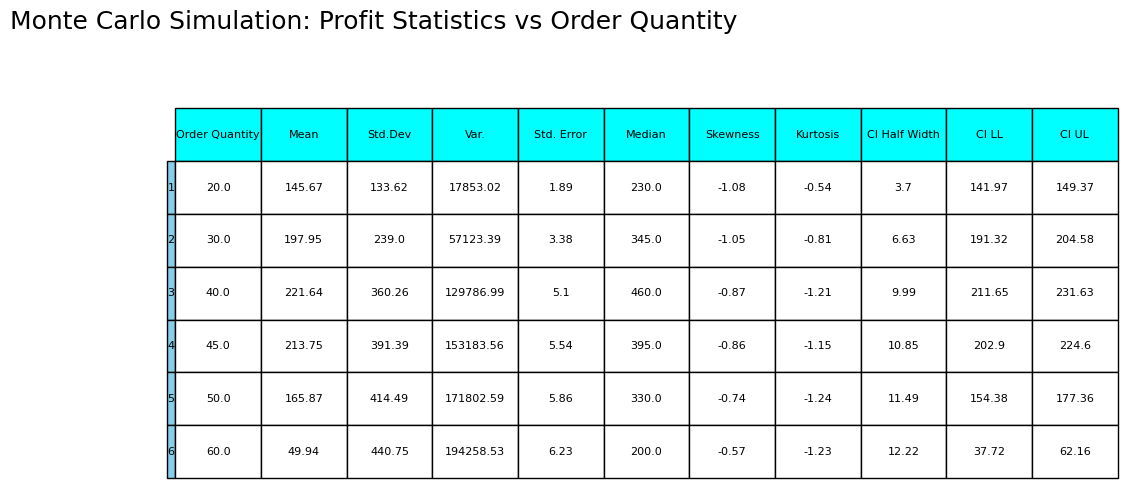

In [35]:
fig, ax = plt.subplots(1,1)
ax.axis('tight')
ax.axis('off')

runs_table = ax.table(cellText = df.values,
                      colLabels = df.columns,
                      rowLabels = df.index +1,
                      rowColours =["skyblue"] * length,
                      colColours =["cyan"]*11,
                      cellLoc='center', loc="center",
                      bbox = [0.1, 0, 1.9, 1.0])
ax.set_title("Monte Carlo Simulation: Profit Statistics vs Order Quantity", fontsize=18, y= 1.2 , pad = 4)

runs_table.auto_set_font_size(False)
runs_table.set_fontsize(8)
plt.savefig(your_path +'MonteCarlo.png',
            bbox_inches='tight', dpi=150)                 
plt.show()

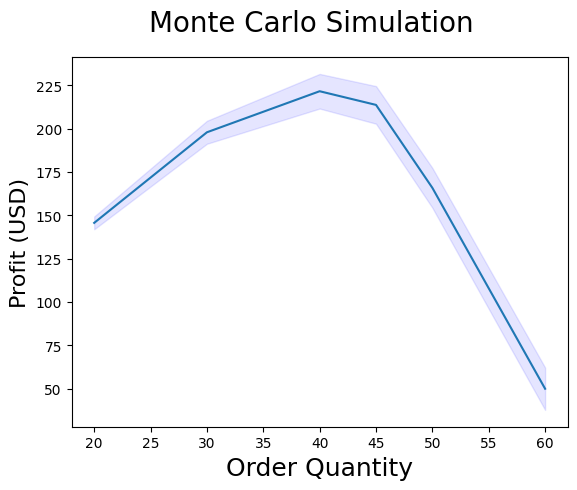

In [36]:
x  = df['Order Quantity']
y  = df['Mean']
ci = df['CI Half Width']

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)
fig.suptitle('Monte Carlo Simulation', fontsize=20)
plt.xlabel('Order Quantity', fontsize=18)
plt.ylabel('Profit (USD)', fontsize=16)

plt.savefig(your_path +'MonteCarlChart.png',
            bbox_inches='tight', dpi=150)
plt.show()